# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

# Dependent Variable (Target Variable):
- Loan_Status

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
loan_data.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


We have imported the dataset and some librarires required for the dataset

Problem:
1. We need to identy the loan status of an applicant and identify if they will get a loan or not. 
2. As we can see that we have to predict YES or NO, means wether they will get the loan or not. So, we are having categories in    the label. Hence we will proceed to build a classification model for the same.  

In [3]:
loan_data.shape

(614, 13)

We can see that we have 614 Rows and 13 COlumns in our dataset. 

In [4]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Above we can check that we have 8 columns in Object datatype non numeric and 5 columns as int datatype numeric form. 

([<matplotlib.patches.Wedge at 0x1b66ff43640>,
 [Text(-0.6105420895241798, 0.9150072988339757, 'yes'),
  Text(0.721549640919558, -1.081372329814693, 'No')])

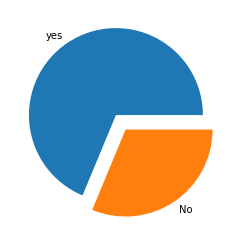

In [5]:
plt.pie(loan_data['Loan_Status'].value_counts(),labels = ['yes','No'], explode =(0,.20))

From the above graph we can see that our labels are not equally distributed. We can see that we have more entries of Yes than No. 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

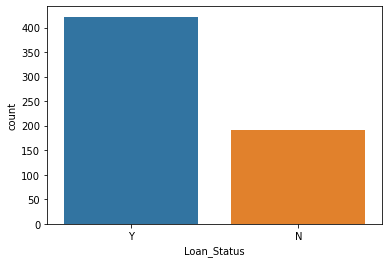

In [6]:
sns.countplot(loan_data['Loan_Status'])

The same can be seen using a countpolot. We can see that we have approx 420, application approved and 180 rejected 

<AxesSubplot:xlabel='Gender', ylabel='count'>

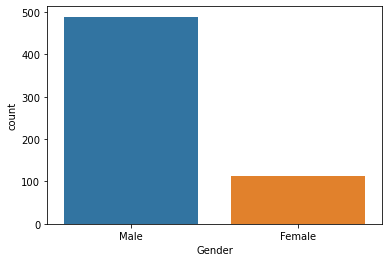

In [7]:
sns.countplot(loan_data['Gender'])

([<matplotlib.patches.Wedge at 0x1b670320b50>,
 [Text(-0.9168069130532235, 0.6078363958976293, 'Male'),
  Text(1.0834990790629, -0.7183521042426533, 'Female')])

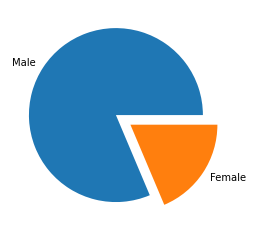

In [8]:
plt.pie(loan_data['Gender'].value_counts(),labels = ['Male','Female'], explode =(0,.20))

We can see mostly males have applied for the loan. The number of male applicants is:- 490 and female applicants are:- 100

<AxesSubplot:xlabel='Married', ylabel='count'>

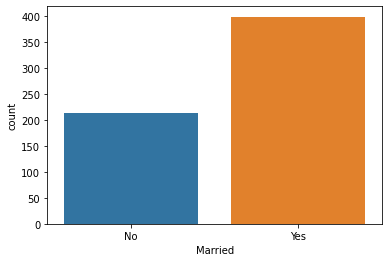

In [9]:
sns.countplot(loan_data['Married'])

([<matplotlib.patches.Wedge at 0x1b6703ba430>,
 [Text(-0.5036682488509456, 0.9779152801237038, 'No'),
  Text(0.595244294096572, -1.1557180583280138, 'Yes')])

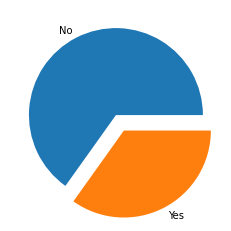

In [10]:
plt.pie(loan_data['Married'].value_counts(),labels = ['No','Yes'], explode =(0,.20))

From the above graph we can say that most of the applications are from the married people. Unmarried people don't need loan :)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

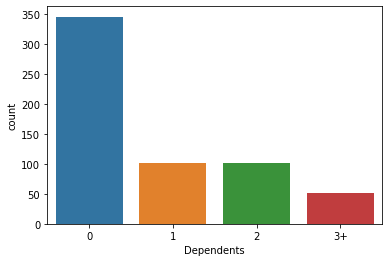

In [11]:
sns.countplot(loan_data['Dependents'])

([<matplotlib.patches.Wedge at 0x1b670451a90>,
 [Text(-0.26001432028325183, 1.0688276536690275, '0'),
  Text(-0.5829656150954456, -0.9328188954005964, '1'),
  Text(0.5332624941620058, -0.9620972468103819, '2'),
  Text(1.0608836412772824, -0.29073338244903146, '3+')])

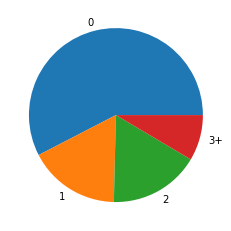

In [12]:
plt.pie(loan_data['Dependents'].value_counts(),labels=['0','1','2','3+'])

We can see that most of the applicants are having 0 dependants, and after that most of them have 1 and 2, only few of them are having 3 or 3+ 

<AxesSubplot:xlabel='Education', ylabel='count'>

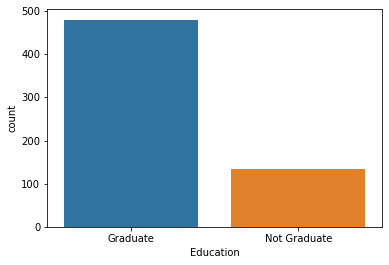

In [13]:
sns.countplot(loan_data['Education'])

([<matplotlib.patches.Wedge at 0x1b6704e5f70>,
 [Text(-0.8514262161117528, 0.6964721089301588, 'Graduate'),
  Text(0.8514262161117524, -0.6964721089301593, 'Non Graduate')])

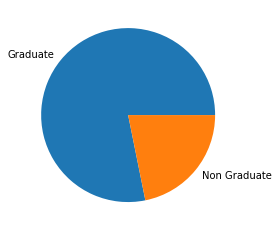

In [14]:
plt.pie(loan_data['Education'].value_counts(),labels= ['Graduate','Non Graduate'])

From the above graph we can say that most of the applicants are graduate. We have approx 490 applicants who are graduated and only 130 approx are non graduate.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

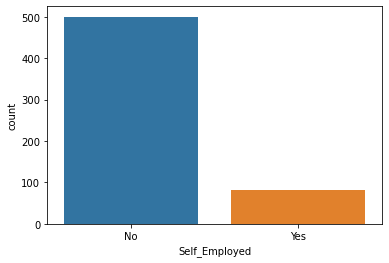

In [15]:
sns.countplot(loan_data['Self_Employed'])

We can see only approx 90 applicants are self employed like running their own business and approx490 are working for others like job. 

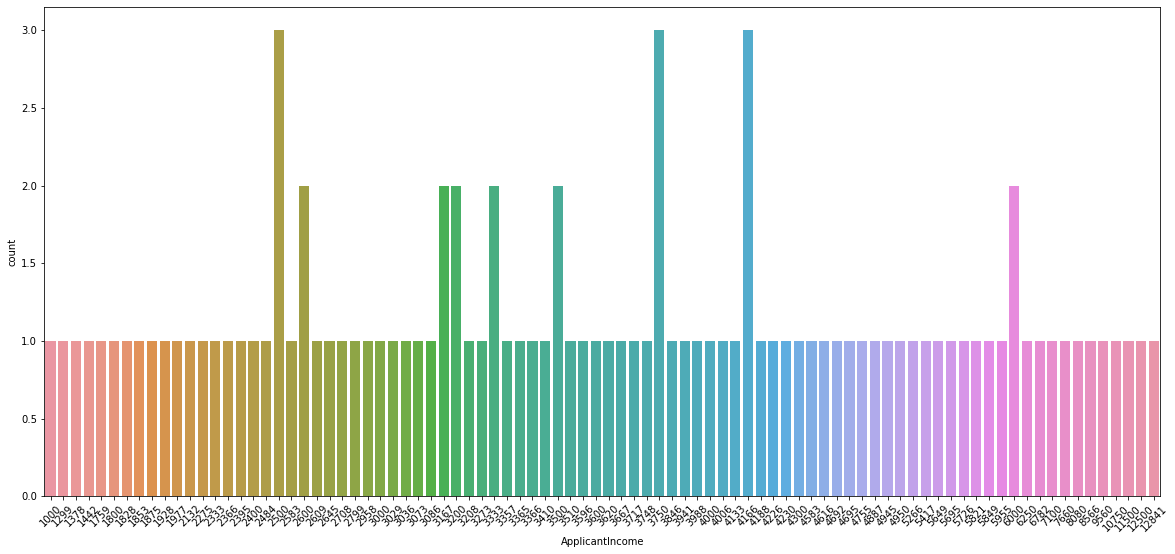

In [16]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=45)
sns.countplot(loan_data['ApplicantIncome'].head(100))
plt.show()

From gthe above 100 results of the applicant income we can say that we have only 1 applicant from different income group. However, in few income group like 2500, 3750 and 4166 we have 3 applicants and 2600,3167,3200,3333,3500,6000 we have upto 3 applicants. 

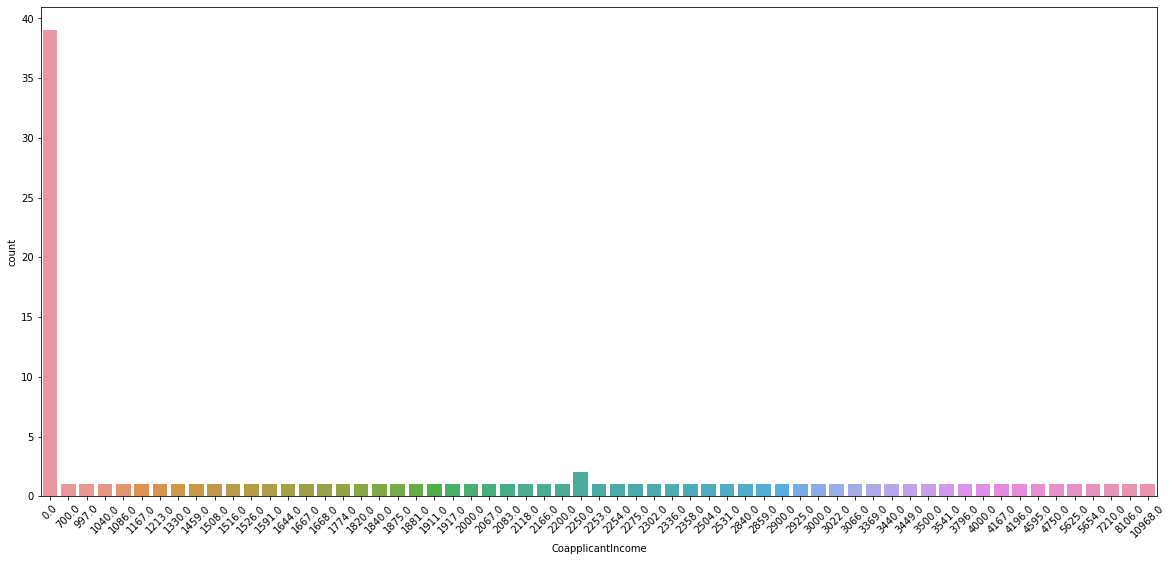

In [17]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=45)
sns.countplot(loan_data['CoapplicantIncome'].head(100))
plt.show()

This data is for first 100 applicants. 
We can say that we have several income groups in this column and most of the co applicants are having 0 income and approx 3 applicant whose coapplicant is having 2250 income. 

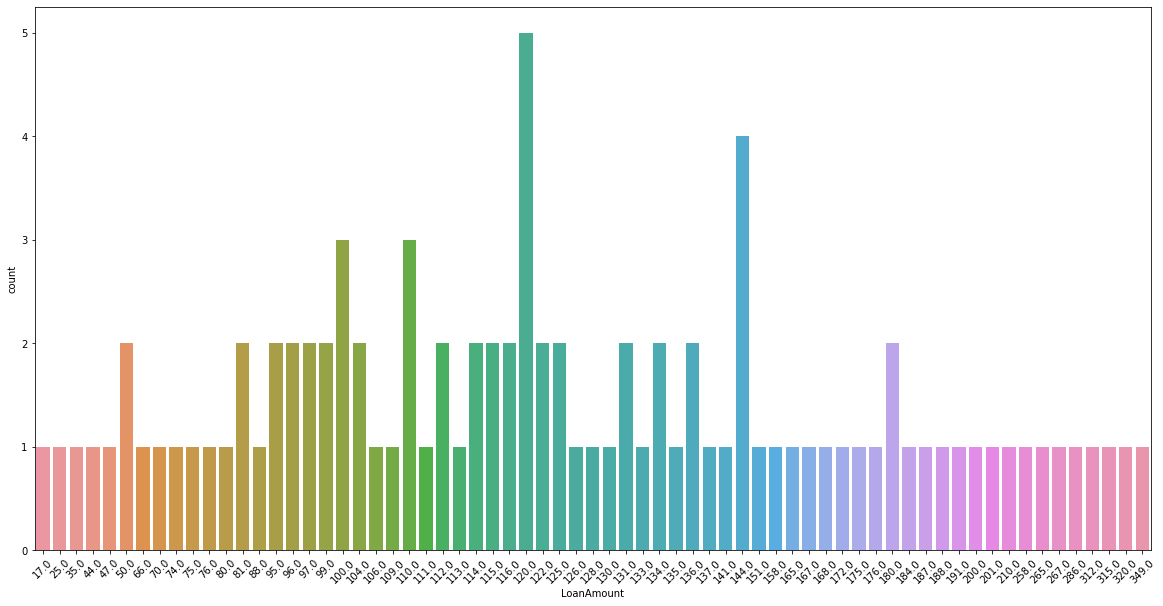

In [18]:
#			Credit_History	Property_Area	Loan_Status
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(loan_data['LoanAmount'].head(100))
plt.show()

The above countplot shows the count of the loan amount required by the applicants. We can see most of the applicants are falling under 120 span. 

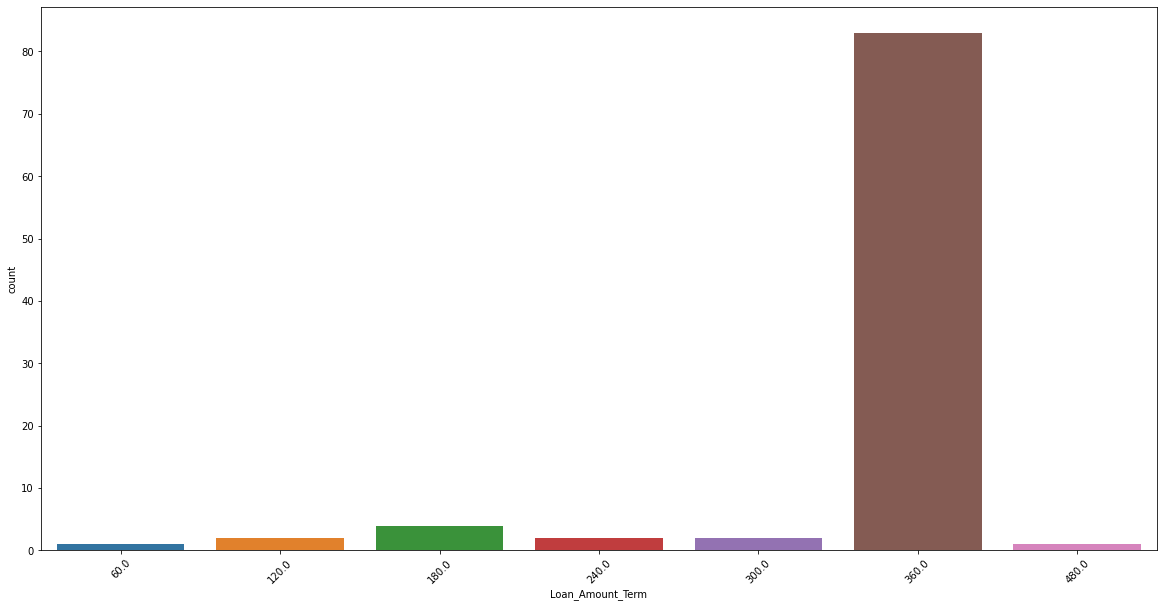

In [19]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(loan_data['Loan_Amount_Term'].head(100))
plt.show()

The above graph shows the term of loan in months. We can say that maximum applicants applied for the loan for 360 months. 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

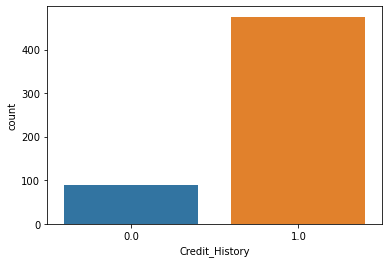

In [20]:
sns.countplot(loan_data['Credit_History'])

([<matplotlib.patches.Wedge at 0x1b6710e21f0>,
 [Text(-0.9675746180179844, 0.5232584051569089, 'Yes'),
  Text(1.1874780004200964, -0.6421806587855865, 'No')])

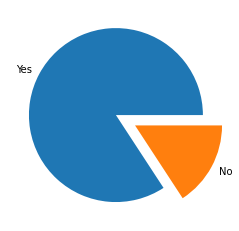

In [21]:
plt.pie(loan_data['Credit_History'].value_counts(),labels=['Yes','No'], explode=(0, .25))

We can see that most of the applicants are having good credit history, hence they will be able to get the loan. 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

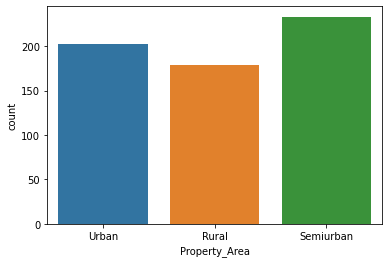

In [22]:
sns.countplot(loan_data['Property_Area'])

([<matplotlib.patches.Wedge at 0x1b671421a00>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Urban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Rural Property Area'),
  Text(0.67000963198199, -0.8724030565348555, 'Semi Urban')])

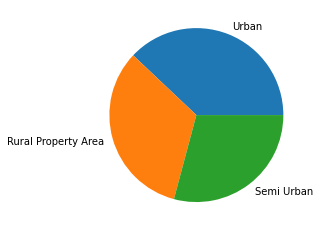

In [23]:
plt.pie(loan_data['Property_Area'].value_counts(),labels=['Urban','Rural Property Area','Semi Urban'])

We can see that most of the applicants are from semiurban followed by urban and least are from rural property area. 

In [24]:
col = loan_data.columns
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

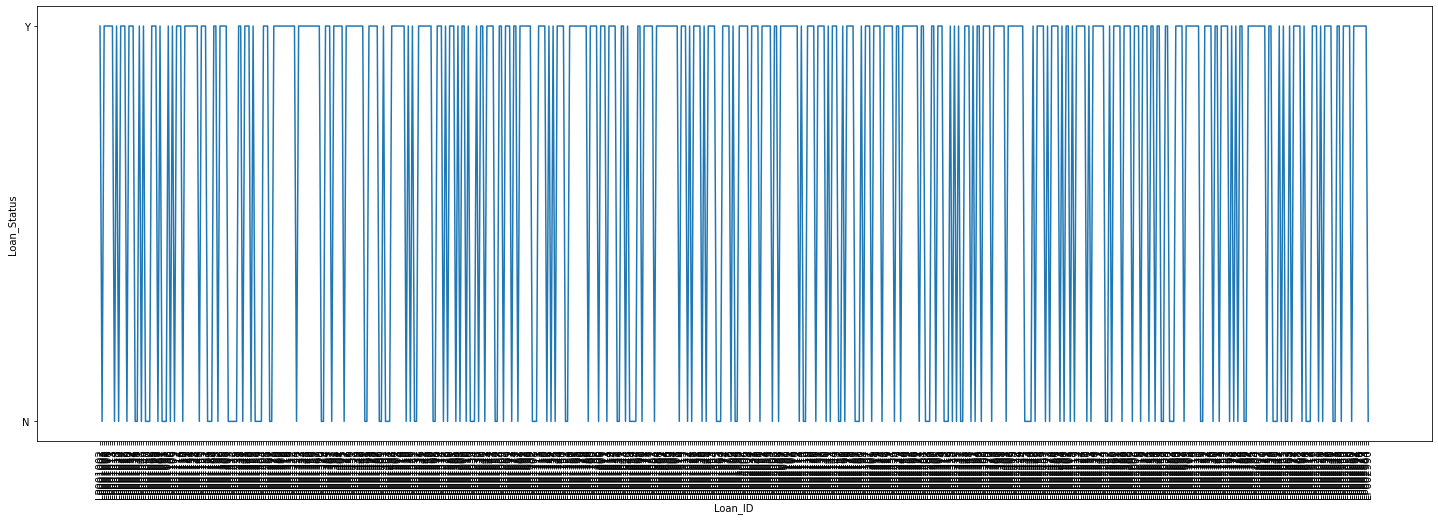

In [25]:
plt.figure(figsize =(25,8))
plt.xticks(rotation=90)
sns.lineplot(x='Loan_ID',y='Loan_Status',data=loan_data)
plt.show

From the above graph we can say that every applicants have received a loan id and hence this columns is not contributing much for the label.

Data Cleansing

In [26]:
#checking misisng values and datatypes of our columns. 
print("The data types of columns with missing values is :-\n")
count = []
for i in col:
    print(i)    
    if loan_data[i].isnull().sum() > 0:
        print("The", i,"column has null values")
        print("Null values in the column is:",loan_data[i].isnull().sum())
        print("The datatype of the columns is:", loan_data[i].dtypes)
        print("\n")
    else:
        print("No null values in",i,"and datatype is",loan_data[i].dtypes)
        print("\n")

The data types of columns with missing values is :-

Loan_ID
No null values in Loan_ID and datatype is object


Gender
The Gender column has null values
Null values in the column is: 13
The datatype of the columns is: object


Married
The Married column has null values
Null values in the column is: 3
The datatype of the columns is: object


Dependents
The Dependents column has null values
Null values in the column is: 15
The datatype of the columns is: object


Education
No null values in Education and datatype is object


Self_Employed
The Self_Employed column has null values
Null values in the column is: 32
The datatype of the columns is: object


ApplicantIncome
No null values in ApplicantIncome and datatype is int64


CoapplicantIncome
No null values in CoapplicantIncome and datatype is float64


LoanAmount
The LoanAmount column has null values
Null values in the column is: 22
The datatype of the columns is: float64


Loan_Amount_Term
The Loan_Amount_Term column has null values
Nul

We can see that we have 7 columns with null values and with their corresponding datatype. We have 4 columns with object datatype and rest 3 are float. We can see that our dataset is having some columns with object values, so we will first encode the data. Once done we will proceed to remove the null values from the dataset. As we can see that our dataset is having object values so we will first encode it and then will proceed to treat the null values.   

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

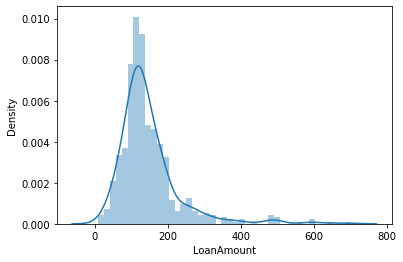

In [27]:
sns.distplot(loan_data["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

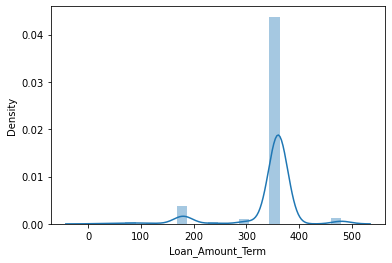

In [28]:
sns.distplot(loan_data["Loan_Amount_Term"])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

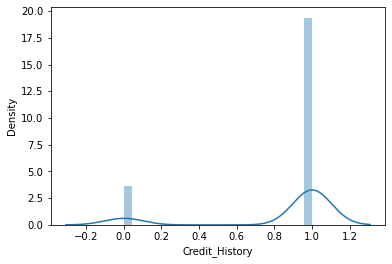

In [29]:
sns.distplot(loan_data["Credit_History"])

In [30]:
for i in col:
    print(i)    
    if loan_data[i].isnull().sum() > 0:
        print("The", i,"column has null values")
        print("Null values in the column is:",loan_data[i].isnull().sum())
        print("The datatype of the columns is:", loan_data[i].dtypes)
        print("\n")
    else:
        print("No null values in",i,"and datatype is",loan_data[i].dtypes)
        print("\n")
        
print("Total Null values in the Dataset are:",loan_data.isnull().sum())

Loan_ID
No null values in Loan_ID and datatype is object


Gender
The Gender column has null values
Null values in the column is: 13
The datatype of the columns is: object


Married
The Married column has null values
Null values in the column is: 3
The datatype of the columns is: object


Dependents
The Dependents column has null values
Null values in the column is: 15
The datatype of the columns is: object


Education
No null values in Education and datatype is object


Self_Employed
The Self_Employed column has null values
Null values in the column is: 32
The datatype of the columns is: object


ApplicantIncome
No null values in ApplicantIncome and datatype is int64


CoapplicantIncome
No null values in CoapplicantIncome and datatype is float64


LoanAmount
The LoanAmount column has null values
Null values in the column is: 22
The datatype of the columns is: float64


Loan_Amount_Term
The Loan_Amount_Term column has null values
Null values in the column is: 14
The datatype of the col

In [31]:
loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode)[0]
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode)[0]
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode)[0]
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode)[0]

Here filling NaN values with mode as these columns have objects stypes. 

In [32]:
loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].median())
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].median())
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].median())

Here we have filled NAN values with median as these columns are in float datatype and they are not normally distributed

In [33]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can check that we have successfully removed the null values from the dataset

ApplicantIncome         AxesSubplot(0.125,0.71587;0.0945122x0.16413)
CoapplicantIncome    AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
LoanAmount           AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Loan_Amount_Term     AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Credit_History       AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
dtype: object

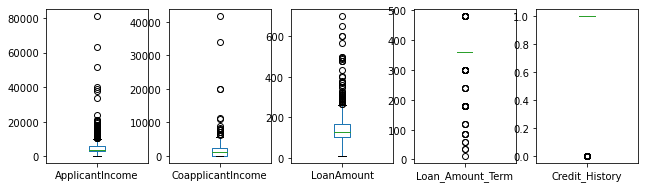

In [34]:
loan_data.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

In [35]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in col:
    if loan_data[i].dtypes == 'object':
        loan_data[i] = label.fit_transform(loan_data[i])

We are converting the object dataset to numerical values. We have called LabelEncoder that will convert the object values to numerical in the form of 0 and 1. 

In [36]:
loan_data.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,2,1
3,3,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,0,0,0,0,0,5417,4196.0,267.0,360.0,1.0,2,1
6,6,0,0,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,7,0,0,0,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,8,0,0,0,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,9,0,0,0,0,0,12841,10968.0,349.0,360.0,1.0,1,0


Above we can check that our dataset containg all numerical values now. 

In [37]:
 loan_data.drop("Loan_ID",axis = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,2,1
3,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,0,0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,0,0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,0,0,0,0,0,7583,0.0,187.0,360.0,1.0,2,1


We checked that loan id is just a random number similar to index, and different for each applicant hence we dropped the column. 

Loan_ID                  AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Gender                AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Married               AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Dependents            AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Education             AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Self_Employed         AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
ApplicantIncome       AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
CoapplicantIncome       AxesSubplot(0.125,0.518913;0.0945122x0.16413)
LoanAmount           AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
Loan_Amount_Term     AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
Credit_History       AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
Property_Area        AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
Loan_Status          AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
dtype: object

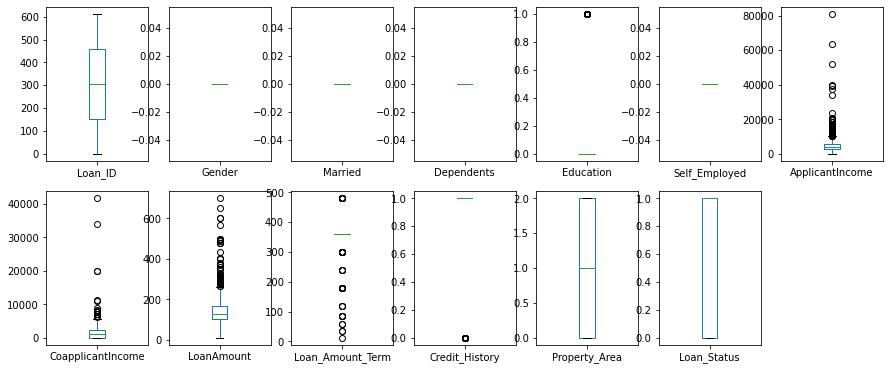

In [38]:
loan_data.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We can check that some columns in the dataset is having outliers. 
1. ApplicantIncome
2. CoapplicantIncome
3. Loan AMount
4. Loan amount term

In [39]:
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

25 quartile of is: 2877.5
75 quartile of is: 5795.0
The IQR value is: 2917.5
The high value is 10171.25
The low value is -1498.75


ApplicantIncome    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

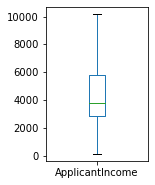

In [40]:
q1 = loan_data['ApplicantIncome'].quantile(.25)
q3 = loan_data['ApplicantIncome'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(loan_data[loan_data['ApplicantIncome'] > high_range]) 
(loan_data[loan_data['ApplicantIncome'] < low_range])

loan_data['ApplicantIncome'] = np.where(
    loan_data['ApplicantIncome'] > high_range,
    high_range,
    np.where(
        loan_data['ApplicantIncome'] < low_range,
        low_range,
        loan_data['ApplicantIncome']
    )
)

loan_data['ApplicantIncome'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.0
75 quartile of is: 2297.25
The IQR value is: 2297.25
The high value is 5743.125
The low value is -3445.875


CoapplicantIncome    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

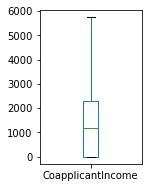

In [41]:
q1 = loan_data['CoapplicantIncome'].quantile(.25)
q3 = loan_data['CoapplicantIncome'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(loan_data[loan_data['CoapplicantIncome'] > high_range]) 
(loan_data[loan_data['CoapplicantIncome'] < low_range])

loan_data['CoapplicantIncome'] = np.where(
    loan_data['CoapplicantIncome'] > high_range,
    high_range,
    np.where(
        loan_data['CoapplicantIncome'] < low_range,
        low_range,
        loan_data['CoapplicantIncome']
    )
)

loan_data['CoapplicantIncome'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 100.25
75 quartile of is: 164.75
The IQR value is: 64.5
The high value is 261.5
The low value is 3.5


LoanAmount    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

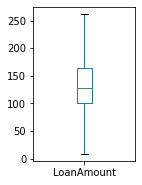

In [42]:
q1 = loan_data['LoanAmount'].quantile(.25)
q3 = loan_data['LoanAmount'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(loan_data[loan_data['LoanAmount'] > high_range]) 
(loan_data[loan_data['LoanAmount'] < low_range])

loan_data['LoanAmount'] = np.where(
    loan_data['LoanAmount'] > high_range,
    high_range,
    np.where(
        loan_data['LoanAmount'] < low_range,
        low_range,
        loan_data['LoanAmount']
    )
)

loan_data['LoanAmount'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 360.0
75 quartile of is: 360.0
The IQR value is: 0.0
The high value is 360.0
The low value is 360.0


Loan_Amount_Term    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

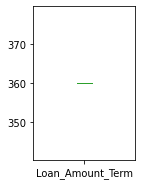

In [43]:
q1 = loan_data['Loan_Amount_Term'].quantile(.25)
q3 = loan_data['Loan_Amount_Term'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(loan_data[loan_data['Loan_Amount_Term'] > high_range]) 
(loan_data[loan_data['Loan_Amount_Term'] < low_range])

loan_data['Loan_Amount_Term'] = np.where(
    loan_data['Loan_Amount_Term'] > high_range,
    high_range,
    np.where(
        loan_data['Loan_Amount_Term'] < low_range,
        low_range,
        loan_data['Loan_Amount_Term']
    )
)

loan_data['Loan_Amount_Term'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

In [44]:
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

for col in df_new:
    print(col)
    print(df_new[col].skew())
    if (df_new[col].skew() > 0.55 or df_new[col].skew() < -0.55): 
        print("Column is having skewness")
    else:
        print("No skewness is present")
    
    plt.figure()
    sns.distplot(df_new[col])
    plt.show()

The column Education  is having skewness 1.367622010164177


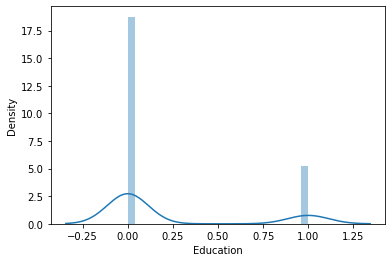

1.367622010164177
Value after correcting the skewness:- 1.367622010164177


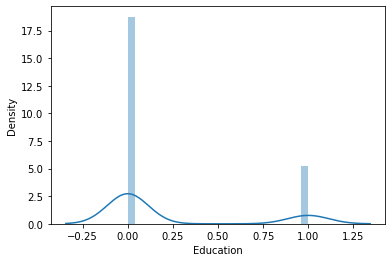

The column ApplicantIncome  is having skewness 1.0398459567416636


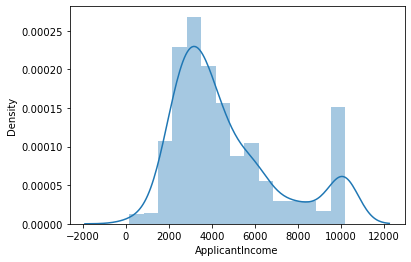

0.5407405359801637
Value after correcting the skewness:- 0.5407405359801637


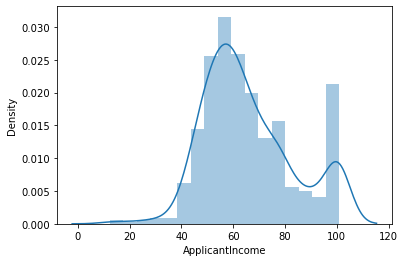

The column CoapplicantIncome  is having skewness 1.012762761452279


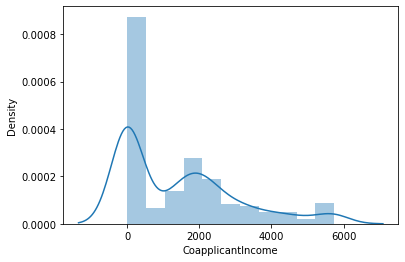

0.19282967978686388
Value after correcting the skewness:- 0.19282967978686388


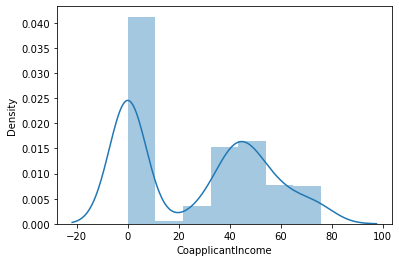

The column LoanAmount  is having skewness 0.6836926591947383


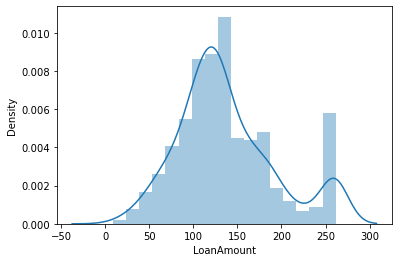

0.06413966158093104
Value after correcting the skewness:- 0.06413966158093104


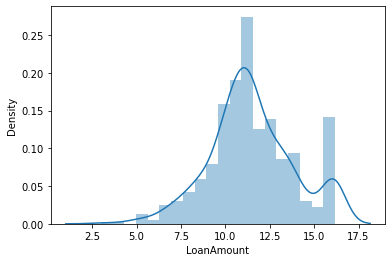

The column Credit_History  is having skewness -2.0219705924848985


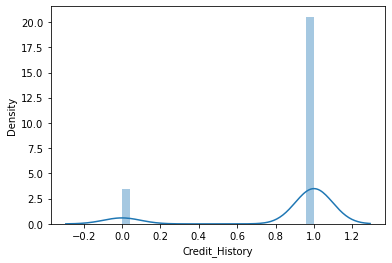

-2.0219705924848985
Value after correcting the skewness:- -2.0219705924848985


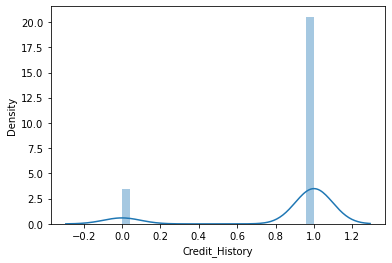

The column Loan_Status  is having skewness -0.8099980938586473


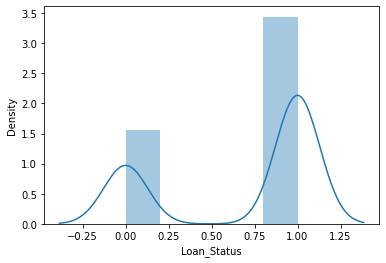

-0.8099980938586473
Value after correcting the skewness:- -0.8099980938586473


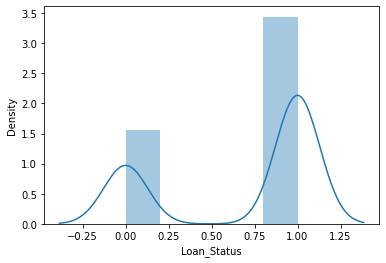

In [46]:
for i in col:
    if loan_data[i].skew() > 0.55 or loan_data[i].skew() < -0.55:
        print("The column",i," is having skewness",loan_data[i].skew())
        plt.figure()
        sns.distplot(loan_data[i])
        plt.show()
        
        loan_data[i] = np.sqrt(loan_data[i])
        print(loan_data[i].skew())
        print("Value after correcting the skewness:-",loan_data[i].skew())
        plt.figure()
        sns.distplot(loan_data[i])
        plt.show()
        

We can see that the bewlow columns are having skewness present as their curve is not normally distributed:-

In [47]:
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
wine.head(

SyntaxError: unexpected EOF while parsing (<ipython-input-48-9e746ab62b6e>, line 1)

<function matplotlib.pyplot.show(close=None, block=None)>

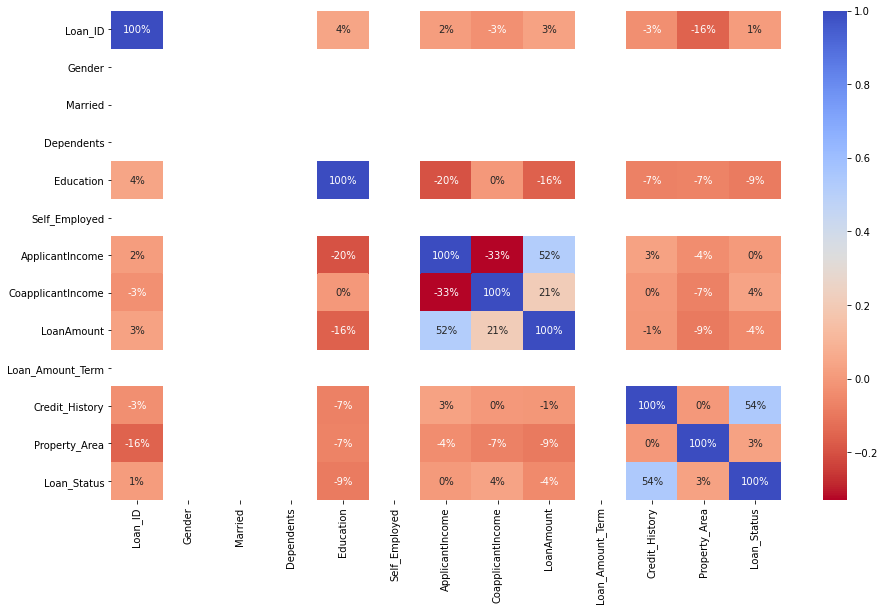

In [49]:
plt.figure(figsize=(15,9))
sns.heatmap(loan_data.corr(),annot=True,fmt='.0%', cmap = 'coolwarm_r')
plt.show

In [50]:
loan_data =loan_data.drop("Loan_ID",axis = 1)

In [51]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0.0,0,76.478755,0.000000,11.313708,360.0,1.0,2,1.0
1,0,0,0,0.0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0.0
2,0,0,0,0.0,0,54.772256,0.000000,8.124038,360.0,1.0,2,1.0
3,0,0,0,1.0,0,50.823223,48.559242,10.954451,360.0,1.0,2,1.0
4,0,0,0,0.0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1.0


In [52]:
loan_data.shape

(614, 12)

In [53]:
x = loan_data.iloc[:,0:6]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome
0,0,0,0,0.0,0,76.478755
1,0,0,0,0.0,0,67.697858
2,0,0,0,0.0,0,54.772256
3,0,0,0,1.0,0,50.823223
4,0,0,0,0.0,0,77.459667


We divided the dataset into 2. X contains all the independant variables that we have for the dataset.  

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [55]:
y = loan_data["Loan_Status"]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

Y contains our label output target variable.

In [56]:
from sklearn.model_selection import train_test_split

We have called train test split to feed training and testing data to our ML model. 

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

We have splitted the data into trainig and testing part. Here we have splitted the data with a ratio of 70:30. 70% part will go for training and remaining 30% will go for the testing part. 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

We called all the algorithms reuired to build a machine ,earning model for the classification problem.

In [59]:
log = LogisticRegression()
nv = GaussianNB()
support = SVC(probability=True)
knear = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()

We have assigned a variable to the respective algorithms, which can be called to perform the acion done by an algorithms. 

In [60]:
def predict_model(X):
    X.fit(x_train,y_train)
    prediction = X.predict(x_test)
    print("Details for",X,"Model :-")
    print("The accuracy score for",X,"is:-",accuracy_score(y_test,prediction)*100,'\n')
    cm = confusion_matrix(y_test,prediction)
    print("The confusion matrix for",X,"is :- \n",cm,'\n')    
    print("The classification report for",X,"is:- \n",classification_report(y_test,prediction),'\n')
    
    from sklearn.model_selection import cross_val_score
    cv_score = cross_val_score(X,x,y,cv=5)
    print('\n')
    print("Cross Validation Score for",X,"is:- \n",cv_score)
    print("Mean of Cross Validation Score for",X,"is:- \n",cv_score.mean())
    print("Standard Deviation of Cross Validation Score for",X,"is:- \n",cv_score.std())
    print('\n')
    
    print(X,'Model Score',accuracy_score(y_test,prediction)*100)
    print('Mean Score After CV',)
    print("Model Score is", accuracy_score(y_test,prediction)-cv_score.mean())
    print('\n')
    
    print("Printing the AUC/RUC curve for the model")
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    y_predict_prob = X.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=X)
    plt.xlabel('False')
    plt.ylabel('True')
    plt.title(X)
    plt.show()

We created a function which will take the variable assigned to the algorithms and will fir the data to the algorithms and predict the data on the basis of the testing data and then show us the:-

1. accuracy score
2. confusion_matrix
3. classification_report, for the model. 

After that we called the Cross validation score from sklearn library which will calculate the cross validation score. We can evaluate and compare the algorithms using the same. 

Once done the function will print the AUC/ROC curve. 

Details for LogisticRegression() Model :-
The accuracy score for LogisticRegression() is:- 67.02702702702703 

The confusion matrix for LogisticRegression() is :- 
 [[  0  61]
 [  0 124]] 

The classification report for LogisticRegression() is:- 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        61
         1.0       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185
 



Cross Validation Score for LogisticRegression() is:- 
 [0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
Mean of Cross Validation Score for LogisticRegression() is:- 
 0.6872984139677463
Standard Deviation of Cross Validation Score for LogisticRegression() is:- 
 0.0036872105184800976


LogisticRegression() Model Score 67.02702702702703
Mean Score After CV
Model Score is -0.01702814369747596


Printing the AUC/

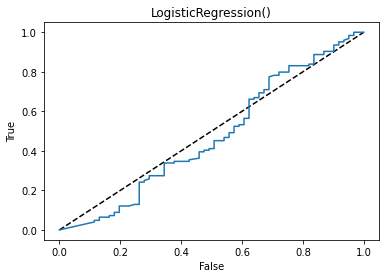

In [68]:
#INPUTS: log, nv, support, knear , dec_tree
#predict_model(int(input("Enter Model Name ")))
predict_model(log)

We are calling the function with the desired algorithm whise score we wants to calculate

In [69]:
import pickle
filename = 'loan_application.pkl'
pickle.dump(log, open(filename, 'wb'))